# Data analysis of civil service examination of EMBRAPA, 2025.

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Broad group

In [101]:
broad_df = pd.read_csv('data/results_broad.csv')
print(broad_df.head())

focus = "Final Grade"

        Name  General Grade  General Result  Complementary Grade  \
0  Alexandre             19              29                   20   
1      Alice              8              23                   21   
2     Alicia             15              25                   18   
3      Aline             19              27                   25   
4      Aline             24              32                   22   

   Complementary Result  Specific grade  Specific result  Final Grade  
0                    25              12               21         51.0  
1                    25              13               19         42.0  
2                    22              16               21         49.0  
3                    27              25               26         69.0  
4                    26              15               22         61.0  


### Core info

In [102]:
for col in broad_df.columns[1:]:
    if col.endswith("Grade") or col == "Final Grade":
        print(f"\nStatistics for {col}:")
        print("Mean:", broad_df[col].mean())
        print("Median:", broad_df[col].median())
        print("Mode:", broad_df[col].mode().values)
        print("Minimum:", broad_df[col].min())
        print("Maximum:", broad_df[col].max())



Statistics for General Grade:
Mean: 16.12542372881356
Median: 16.0
Mode: [16]
Minimum: 8
Maximum: 32

Statistics for Complementary Grade:
Mean: 16.0135593220339
Median: 16.0
Mode: [16]
Minimum: 6
Maximum: 28

Statistics for Final Grade:
Mean: 46.06440677966102
Median: 46.0
Mode: [48.]
Minimum: 30.0
Maximum: 73.0


### Histogram for focus grade

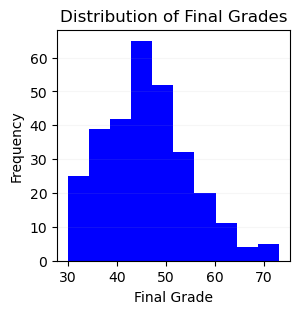

In [103]:
plt.figure(figsize=(3, 3))
plt.hist(broad_df[focus], bins=10, color='blue', alpha=1)
plt.title('Distribution of Final Grades')
plt.xlabel(focus)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.1)
# save as svg
plt.savefig(f'results/{focus}_distribution.svg', format='svg')

### Boxplot for focus grade

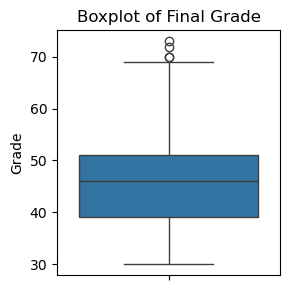

In [104]:
plt.figure(figsize=(3, 3))
sns.boxplot(data=broad_df, y=focus)
plt.title(f"Boxplot of {focus}")
plt.ylabel("Grade")
plt.tight_layout() 
plt.savefig(f'results/{focus}_boxplot.svg', format='svg')
plt.show()


### Ranking grades

58


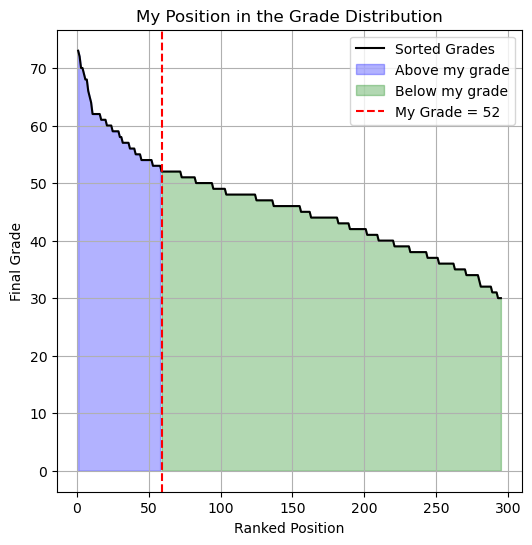

In [105]:
grades = broad_df['Final Grade'].dropna().sort_values(ascending=False).reset_index(drop=True)
x = np.arange(1, len(grades) + 1)

my_grade = 52
my_position = (grades <= my_grade).idxmax()
print(my_position)
plt.figure(figsize=(6, 6))
plt.plot(x, grades, label='Sorted Grades', color='black')

plt.fill_between(x[:my_position], grades[:my_position], color='blue', alpha=0.3, label='Above my grade')

plt.fill_between(x[my_position:], grades[my_position:], color='green', alpha=0.3, label='Below my grade')

plt.axvline(x=my_position + 1, color='red', linestyle='--', label=f'My Grade = {my_grade}')

plt.xlabel("Ranked Position")
plt.ylabel("Final Grade")
plt.title("My Position in the Grade Distribution")
plt.legend()
plt.grid(True)
plt.savefig(f'results/my_position_in_grades.svg', format='svg')
plt.show()
# Save the plot as SVG


In [106]:
value = 52
col = broad_df["Final Grade"].dropna()  # Ensure no NaNs

below = (col < value).mean() * 100
above = (col > value).mean() * 100
equal = (col == value).mean() * 100

print(f"Below {value}: {below:.2f}%")
print(f"Equal to {value}: {equal:.2f}%")
print(f"Above {value}: {above:.2f}%")


Below 52: 75.59%
Equal to 52: 4.75%
Above 52: 19.66%
